## IMPORTING DEPENDENCIES

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa, librosa.display
from tensorflow import keras

import tensorflow as tf 
from sklearn.model_selection import train_test_split

## NEURAL NETWORK MODEL

In [ ]:
X_train = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/X_train.npy')
y_train = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/y_train.npy')
X_test = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/X_test.npy')
y_test = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/y_test.npy')
X_val = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/X_val.npy')
y_val = np.load('/content/gdrive/MyDrive/data/MFCC_Augmented2/y_val.npy')

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(16893, 98) (16893, 2)
(2109, 98) (2109, 2)
(2088, 98) (2088, 2)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Dropout, GRU, Input
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
##### Training ############
from tensorflow.keras import optimizers
model = Sequential([
    Dense(256, input_shape=X_train[0].shape),
    Activation('relu'),
    Dropout(0.5),
    Dense(256),
    Activation('relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               25344     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 5

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(amsgrad=True), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data= (X_val, y_val), epochs=120)
model.save("/content/gdrive/MyDrive/Colab Notebooks/FYP/DNN-Model_Augmented-LFCC-Wavelet.h5")

Epoch 1/120
528/528 [==============================] - 6s 7ms/step - loss: 0.7796 - accuracy: 0.5374 - val_loss: 0.6681 - val_accuracy: 0.6513
Epoch 2/120
528/528 [==============================] - 5s 9ms/step - loss: 0.6826 - accuracy: 0.5551 - val_loss: 0.6652 - val_accuracy: 0.6442
Epoch 3/120
528/528 [==============================] - 3s 6ms/step - loss: 0.6726 - accuracy: 0.5737 - val_loss: 0.6612 - val_accuracy: 0.6365
Epoch 4/120
528/528 [==============================] - 3s 6ms/step - loss: 0.6706 - accuracy: 0.5790 - val_loss: 0.6689 - val_accuracy: 0.6073
Epoch 5/120
528/528 [==============================] - 4s 8ms/step - loss: 0.6620 - accuracy: 0.5968 - val_loss: 0.6488 - val_accuracy: 0.6236
Epoch 6/120
528/528 [==============================] - 4s 8ms/step - loss: 0.6546 - accuracy: 0.6159 - val_loss: 0.6564 - val_accuracy: 0.6049
Epoch 7/120
528/528 [==============================] - 3s 7ms/step - loss: 0.6565 - accuracy: 0.6095 - val_loss: 0.6420 - val_accuracy: 0.6456

In [ ]:
print("Model Score: \n")
score = model.evaluate(X_test, y_test)
print(score)

Model Score: 

66/66 [==============================] - 0s 3ms/step - loss: 0.5462 - accuracy: 0.7141
[0.5462301969528198, 0.7140824794769287]


In [ ]:
pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 KB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9472 sha256=a692f2122219f906128df94d5190ecfeb6af781e3fba479f7d76ad8f367e7191
  Stored in directory: /root/.cache/pip/wheels/97/a5/76/35ae3e15da1ce4530de8591b0bcd7716f6d6752a4808f01c04
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.50-py3-none-any.whl size=320514 sha256=406675ba99c77a3d933ed7da30944791380b2c1c28e363691be41b92fd5b666d
  Stored in directory: /root/.cache/pip/wheels/a3/5f/ba/ddd191edb6c749a63cffabd28714d5600b5b58014daf7434a8
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl siz

(<Figure size 1000x500 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <AxesSubplot:title={'center':'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

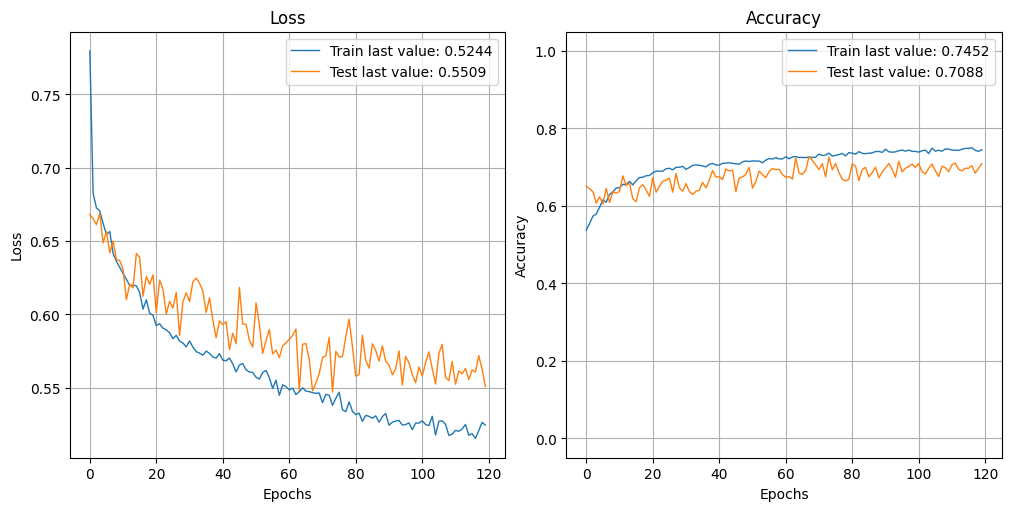

In [ ]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt
plot_history(history)

In [ ]:
import matplotlib.pyplot as plt
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Model Classification Report: 

66/66 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.95      0.45      0.61      1049
           1       0.64      0.98      0.77      1060

    accuracy                           0.71      2109
   macro avg       0.79      0.71      0.69      2109
weighted avg       0.79      0.71      0.69      2109

Confusion matrix, without normalization
[[ 472  577]
 [  26 1034]]


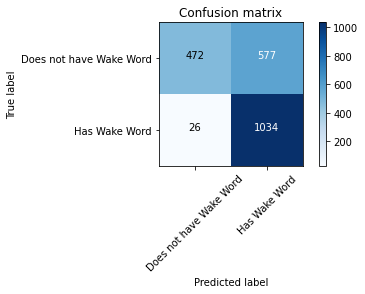

In [ ]:
print("Model Classification Report: \n")
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print(classification_report(np.argmax(y_test, axis=1), y_pred))
plot_confusion_matrix(cm, classes=["Does not have Wake Word", "Has Wake Word"])